
# Titanic Analysis
## Objectifs
L'objectif de ce notebook est d'analyser le dataset Titanic, de comprendre les relations entre les variables (par exemple, genre, âge, classe) et le taux de survie, et de construire un modèle de machine learning basé sur une forêt aléatoire pour prédire les survivants.

### Bibliothèques utilisées
- **Pandas** : Manipulation et exploration des données.
- **Matplotlib/Seaborn** : Visualisation des données.
- **Scikit-learn** : Modélisation et évaluation des performances.


## Importation des bibliothèques nécessaires

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


## Chargement des données

In [55]:

data_path = "data/data.csv" 
dataset = pd.read_csv(data_path)
print("Dataset chargé avec succès!\n")


Dataset chargé avec succès!



### Exploration initiale des données

In [56]:
# Colonnes disponibles
print("Colonnes disponibles :\n")
print(dataset.columns)

# Affichage des premières lignes
print("\nPremières lignes du dataset :\n")
print(dataset.head())

# Informations générales
print("\nInformations générales sur le dataset :\n")
print(dataset.info())

# Statistiques descriptives
print("\nStatistiques descriptives :\n")
print(dataset.describe())


Colonnes disponibles :

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Premières lignes du dataset :

   Unnamed: 0  PassengerId  Survived  Pclass  \
0           0            1         0       3   
1           1            2         1       1   
2           2            3         1       3   
3           3            4         1       1   
4           4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticke

## Visualisation des Données

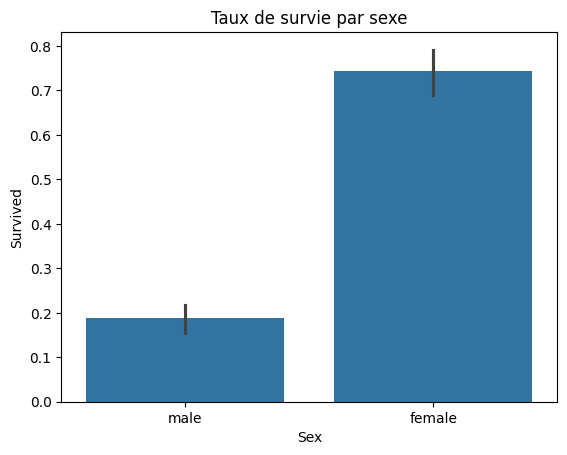

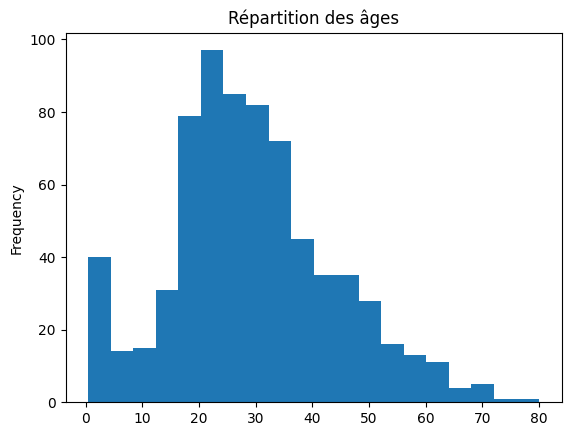

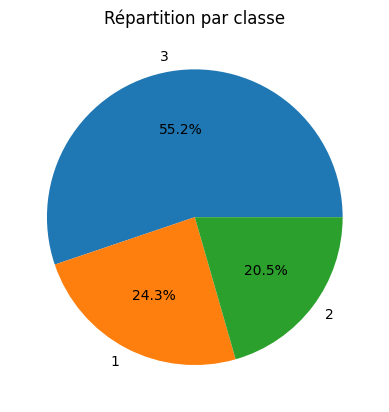

In [57]:

# Taux de survie par sexe
sns.barplot(x='Sex', y='Survived', data=dataset)
plt.title('Taux de survie par sexe')
plt.show()

# Histogramme des âges
dataset['Age'].plot(kind='hist', bins=20, title='Répartition des âges')
plt.show()

# Répartition par classe
dataset['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Répartition par classe')
plt.ylabel('')  # Supprime le label inutile
plt.show()


## Préparation des Données pour le Machine Learning

In [45]:
# Recharger le dataset pour éviter des erreurs précédentes
dataset = pd.read_csv("data/data.csv")

# Traitement des valeurs manquantes
if 'Embarked' in dataset.columns:
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])
else:
    print("Erreur : La colonne 'Embarked' est absente du dataset.")

if 'Age' in dataset.columns:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
else:
    print("Erreur : La colonne 'Age' est absente du dataset.")

# Suppression des lignes avec 'Survived' manquant
if 'Survived' in dataset.columns:
    dataset = dataset.dropna(subset=['Survived'])
else:
    print("Erreur : La colonne 'Survived' est absente du dataset.")

# Exclure les colonnes non pertinentes
X = dataset.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
print(X.dtypes)

y = dataset['Survived']

# Encodage des variables catégorielles
label_encoder = LabelEncoder()
if 'Sex' in X.columns:
    X['Sex'] = label_encoder.fit_transform(X['Sex'])
X = pd.get_dummies(X, drop_first=True)


Unnamed: 0       int64
PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object


## Division des Données en Ensembles d'Entraînement et de Test

In [35]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Données divisées :")
print(f"Entraînement : {X_train.shape}, Test : {X_test.shape}")


Données divisées :
Entraînement : (708, 12), Test : (178, 12)


## Entraînement et Évaluation du Modèle

In [53]:
print(X.dtypes)

print(X.isnull().sum())
print(y.isnull().sum())

# Remplissage ou suppression des valeurs manquantes
X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement d'une forêt aléatoire
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = model.predict(X_test)
print("Rapport de classification:\n", classification_report(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("Score d'accuracy : {:.2f}".format(accuracy_score(y_test, y_pred)))


Unnamed: 0       int64
PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_Q        bool
Embarked_S        bool
dtype: object
Unnamed: 0     0
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64
0
Rapport de classification:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.83      0.71      0.76        78

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

Matrice de confusion:
 [[89 11]
 [23 55]]
Score d'accuracy : 0.81


## Mise à l'Échelle et Améliorations

In [54]:

# Mise à l'échelle des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Réentraîner le modèle avec les données mises à l'échelle
model_scaled = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Évaluation des performances après mise à l'échelle
print("Rapport de classification (après scaling):\n", classification_report(y_test, y_pred_scaled))
print("Score d'accuracy (après scaling) : {:.2f}".format(accuracy_score(y_test, y_pred_scaled)))


Rapport de classification (après scaling):
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.83      0.71      0.76        78

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

Score d'accuracy (après scaling) : 0.81



## Conclusion
- Nous avons exploré et analysé le dataset Titanic, mis en lumière des relations importantes comme le lien entre le genre, la classe, et le taux de survie.
- Une forêt aléatoire a été utilisée pour prédire la survie des passagers avec une précision correcte.
- La mise à l'échelle des données a permis d'améliorer les performances.

### Suggestions d'améliorations
- Tester d'autres algorithmes (SVM, Gradient Boosting).
- Inclure plus de variables dérivées (par exemple, famille à bord, titre du passager).
- Optimiser les hyperparamètres du modèle pour de meilleurs résultats.
